## Data Structures in Pandas
1. Series
2. DataFrame


### Series
- The first main data type we will learn about for pandas is the Series data type.
- A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). 
- What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. 
- It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

### Creating a Series
- You can convert a list,numpy array, or dictionary to a Series:

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'0.23.4'

In [3]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

### lists

In [4]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [5]:
# adding index
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [6]:
# same as above
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

## NumPy Arrays

In [7]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [8]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

## Dictionary

In [9]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

## Data in a Series
A pandas Series can hold a variety of object types:

In [10]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [11]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an Index
- The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

- Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:



In [12]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])

In [13]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [14]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])

In [15]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [16]:
ser1['USA']

1

In [17]:
#Operations are then also done based off of index:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

## Reminder about Built-In Documentation

As you read through this chapter, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab-completion feature) as well as the documentation of various functions (using the ``?`` character). (Refer back to [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb) if you need a refresher on this.)

For example, to display all the contents of the pandas namespace, you can type

```ipython
In [3]: pd.<TAB>
```

And to display Pandas's built-in documentation, you can use this:

```ipython
In [4]: pd?
```

More detailed documentation, along with tutorials and other resources, can be found at http://pandas.pydata.org/.

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [18]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [19]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [20]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [21]:
data[1]

0.5

In [22]:
data[1:3]

1    0.50
2    0.75
dtype: float64

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [23]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [24]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices:

In [25]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [26]:
data[5]

0.5

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [27]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [28]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [29]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

We'll discuss some of the quirks of Pandas indexing and slicing in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [30]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [31]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [32]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [33]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [34]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [35]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [36]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [37]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [38]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [39]:
pd.DataFrame(population, columns=['population'])

population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135

#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [40]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

a  b
0  0  0
1  1  2
2  2  4

Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [41]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

a  b    c
0  1.0  2  NaN
1  NaN  3  4.0

#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [42]:
pd.DataFrame({'population': population,
              'area': area})

population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [43]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

foo       bar
a  0.525959  0.019144
b  0.694048  0.916859
c  0.146854  0.496577

#### From a NumPy structured array

We covered structured arrays in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).
A Pandas ``DataFrame`` operates much like a structured array, and can be created directly from one:

In [44]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [45]:
pd.DataFrame(A)

A    B
0  0  0.0
1  0  0.0
2  0  0.0

## The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [46]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [47]:
ind[1]

3

In [48]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [49]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [50]:
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.
The ``Index`` object follows many of the conventions used by Python's built-in ``set`` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [249]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [250]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [251]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [252]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

These operations may also be accessed via object methods, for example ``indA.intersection(indB)``.

# Operating on Data in Pandas

One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.).
Pandas inherits much of this functionality from NumPy, and the ufuncs that we introduced in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) are key to this.

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.
This means that keeping the context of data and combining data from different sources–both potentially error-prone tasks with raw NumPy arrays–become essentially foolproof ones with Pandas.
We will additionally see that there are well-defined operations between one-dimensional ``Series`` structures and two-dimensional ``DataFrame`` structures.

## Ufuncs: Index Preservation

Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas ``Series`` and ``DataFrame`` objects.
Let's start by defining a simple ``Series`` and ``DataFrame`` on which to demonstrate this:

In [54]:
import pandas as pd
import numpy as np

In [55]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [56]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

A  B  C  D
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4

If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object *with the indices preserved:*

In [57]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Or, for a slightly more complex calculation:

In [58]:
np.sin(df * np.pi / 4)

A             B         C             D
0 -1.000000  7.071068e-01  1.000000 -1.000000e+00
1 -0.707107  1.224647e-16  0.707107 -7.071068e-01
2 -0.707107  1.000000e+00 -0.707107  1.224647e-16

Any of the ufuncs discussed in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) can be used in a similar manner.

## UFuncs: Index Alignment

For binary operations on two ``Series`` or ``DataFrame`` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data, as we'll see in some of the examples that follow.

### Index alignment in Series

As an example, suppose we are combining two different data sources, and find only the top three US states by *area* and the top three US states by *population*:

In [59]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

Let's see what happens when we divide these to compute the population density:

In [60]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the *union* of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices:

In [61]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked with ``NaN``, or "Not a Number," which is how Pandas marks missing data (see further discussion of missing data in [Handling Missing Data](03.04-Missing-Values.ipynb)).
This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are filled in with NaN by default:

In [62]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators.
For example, calling ``A.add(B)`` is equivalent to calling ``A + B``, but allows optional explicit specification of the fill value for any elements in ``A`` or ``B`` that might be missing:

In [63]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index alignment in DataFrame

A similar type of alignment takes place for *both* columns and indices when performing operations on ``DataFrame``s:

In [64]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

A   B
0  1  11
1  5   1

In [65]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

B  A  C
0  4  0  9
1  5  8  0
2  9  2  6

In [66]:
A + B

A     B   C
0   1.0  15.0 NaN
1  13.0   6.0 NaN
2   NaN   NaN NaN

Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.
As was the case with ``Series``, we can use the associated object's arithmetic method and pass any desired ``fill_value`` to be used in place of missing entries.
Here we'll fill with the mean of all values in ``A`` (computed by first stacking the rows of ``A``):

In [67]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

A     B     C
0   1.0  15.0  13.5
1  13.0   6.0   4.5
2   6.5  13.5  10.5

The following table lists Python operators and their equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: Operations Between DataFrame and Series

When performing operations between a ``DataFrame`` and a ``Series``, the index and column alignment is similarly maintained.
Operations between a ``DataFrame`` and a ``Series`` are similar to operations between a two-dimensional and one-dimensional NumPy array.
Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [68]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [69]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

According to NumPy's broadcasting rules (see [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)), subtraction between a two-dimensional array and one of its rows is applied row-wise.

In Pandas, the convention similarly operates row-wise by default:

In [70]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

Q  R  S  T
0  0  0  0  0
1 -1 -2  2  4
2  3 -7  1  4

If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the ``axis`` keyword:

In [71]:
df.subtract(df['R'], axis=0)

Q  R  S  T
0 -5  0 -6 -4
1 -4  0 -2  2
2  5  0  2  7

Note that these ``DataFrame``/``Series`` operations, like the operations discussed above, will automatically align  indices between the two elements:

In [72]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [73]:
df - halfrow

Q   R    S   T
0  0.0 NaN  0.0 NaN
1 -1.0 NaN  2.0 NaN
2  3.0 NaN  1.0 NaN

This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the types of silly errors that might come up when working with heterogeneous and/or misaligned data in raw NumPy arrays.

# Handling Missing Data

The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous.
In particular, many interesting datasets will have some amount of data missing.
To make matters even more complicated, different data sources may indicate missing data in different ways.

In this section, we will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python.
Here and throughout the book, we'll refer to missing data in general as *null*, *NaN*, or *NA* values.

## Trade-Offs in Missing Data Conventions

There are a number of schemes that have been developed to indicate the presence of missing data in a table or DataFrame.
Generally, they revolve around one of two strategies: using a *mask* that globally indicates missing values, or choosing a *sentinel value* that indicates a missing entry.

In the masking approach, the mask might be an entirely separate Boolean array, or it may involve appropriation of one bit in the data representation to locally indicate the null status of a value.

In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with NaN (Not a Number), a special value which is part of the IEEE floating-point specification.

None of these approaches is without trade-offs: use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often non-optimized) logic in CPU and GPU arithmetic. Common special values like NaN are not available for all data types.

As in most cases where no universally optimal choice exists, different languages and systems use different conventions.
For example, the R language uses reserved bit patterns within each data type as sentinel values indicating missing data, while the SciDB system uses an extra byte attached to every cell which indicates a NA state.

## Missing Data in Pandas

The way in which Pandas handles missing values is constrained by its reliance on the NumPy package, which does not have a built-in notion of NA values for non-floating-point data types.

Pandas could have followed R's lead in specifying bit patterns for each individual data type to indicate nullness, but this approach turns out to be rather unwieldy.
While R contains four basic data types, NumPy supports *far* more than this: for example, while R has a single integer type, NumPy supports *fourteen* basic integer types once you account for available precisions, signedness, and endianness of the encoding.
Reserving a specific bit pattern in all available NumPy types would lead to an unwieldy amount of overhead in special-casing various operations for various types, likely even requiring a new fork of the NumPy package. Further, for the smaller data types (such as 8-bit integers), sacrificing a bit to use as a mask will significantly reduce the range of values it can represent.

NumPy does have support for masked arrays – that is, arrays that have a separate Boolean mask array attached for marking data as "good" or "bad."
Pandas could have derived from this, but the overhead in both storage, computation, and code maintenance makes that an unattractive choice.

With these constraints in mind, Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point ``NaN`` value, and the Python ``None`` object.
This choice has some side effects, as we will see, but in practice ends up being a good compromise in most cases of interest.

### ``None``: Pythonic missing data

The first sentinel value used by Pandas is ``None``, a Python singleton object that is often used for missing data in Python code.
Because it is a Python object, ``None`` cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type ``'object'`` (i.e., arrays of Python objects):

In [74]:
import numpy as np
import pandas as pd

In [75]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

This ``dtype=object`` means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects.
While this kind of object array is useful for some purposes, any operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types:

In [76]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
69.3 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
927 µs ± 111 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



The use of Python objects in an array also means that if you perform aggregations like ``sum()`` or ``min()`` across an array with a ``None`` value, you will generally get an error:

In [77]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

This reflects the fact that addition between an integer and ``None`` is undefined.

### ``NaN``: Missing numerical data

The other missing data representation, ``NaN`` (acronym for *Not a Number*), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [78]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

Notice that NumPy chose a native floating-point type for this array: this means that unlike the object array from before, this array supports fast operations pushed into compiled code.
You should be aware that ``NaN`` is a bit like a data virus–it infects any other object it touches.
Regardless of the operation, the result of arithmetic with ``NaN`` will be another ``NaN``:

In [79]:
1 + np.nan

nan

In [80]:
0 *  np.nan

nan

Note that this means that aggregates over the values are well defined (i.e., they don't result in an error) but not always useful:

In [81]:
vals2.sum(), vals2.min(), vals2.max()

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [82]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

Keep in mind that ``NaN`` is specifically a floating-point value; there is no equivalent NaN value for integers, strings, or other types.

### NaN and None in Pandas

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [83]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value, Pandas automatically type-casts when NA values are present.
For example, if we set a value in an integer array to ``np.nan``, it will automatically be upcast to a floating-point type to accommodate the NA:

In [84]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [85]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point, Pandas automatically converts the ``None`` to a ``NaN`` value.
(Be aware that there is a proposal to add a native integer NA to Pandas in the future; as of this writing, it has not been included).

While this type of magic may feel a bit hackish compared to the more unified approach to NA values in domain-specific languages like R, the Pandas sentinel/casting approach works quite well in practice and in my experience only rarely causes issues.

The following table lists the upcasting conventions in Pandas when NA values are introduced:

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

Keep in mind that in Pandas, string data is always stored with an ``object`` dtype.

## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [86]:
data = pd.Series([1, np.nan, 'hello', None])

In [87]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

As mentioned in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb), Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [88]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [89]:
data.dropna()

0        1
2    hello
dtype: object

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [90]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [91]:
df.dropna()

0    1  2
1  2.0  3.0  5

Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [92]:
df.dropna(axis='columns')

2
0  2
1  5
2  6

But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [93]:
df[3] = np.nan
df

0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

In [94]:
df.dropna(axis='columns', how='all')

0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [95]:
df.dropna(axis='rows', thresh=3)

0    1  2   3
1  2.0  3.0  5 NaN

Here the first and last row have been dropped, because they contain only two non-null values.

### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [96]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

We can fill NA entries with a single value, such as zero:

In [97]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [98]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [99]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [100]:
df

0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

In [101]:
df.fillna(method='ffill', axis=1)

0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0

Notice that if a previous value is not available during a forward fill, the NA value remains.

# Hierarchical Indexing

Up to this point we've been focused primarily on one-dimensional and two-dimensional data, stored in Pandas ``Series`` and ``DataFrame`` objects, respectively.
Often it is useful to go beyond this and store higher-dimensional data–that is, data indexed by more than one or two keys.
While Pandas does provide ``Panel`` and ``Panel4D`` objects that natively handle three-dimensional and four-dimensional data (see [Aside: Panel Data](#Aside:-Panel-Data)), a far more common pattern in practice is to make use of *hierarchical indexing* (also known as *multi-indexing*) to incorporate multiple index *levels* within a single index.
In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional ``Series`` and two-dimensional ``DataFrame`` objects.

In this section, we'll explore the direct creation of ``MultiIndex`` objects, considerations when indexing, slicing, and computing statistics across multiply indexed data, and useful routines for converting between simple and hierarchically indexed representations of your data.

We begin with the standard imports:

In [102]:
import pandas as pd
import numpy as np

## A Multiply Indexed Series

Let's start by considering how we might represent two-dimensional data within a one-dimensional ``Series``.
For concreteness, we will consider a series of data where each point has a character and numerical key.

### The bad way

Suppose you would like to track data about states from two different years.
Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys:

In [103]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

With this indexing scheme, you can straightforwardly index or slice the series based on this multiple index:

In [104]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

But the convenience ends there. For example, if you need to select all values from 2010, you'll need to do some messy (and potentially slow) munging to make it happen:

In [105]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

This produces the desired result, but is not as clean (or as efficient for large datasets) as the slicing syntax we've grown to love in Pandas.

### The Better Way: Pandas MultiIndex
Fortunately, Pandas provides a better way.
Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas ``MultiIndex`` type gives us the type of operations we wish to have.
We can create a multi-index from the tuples as follows:

In [106]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

Notice that the ``MultiIndex`` contains multiple *levels* of indexing–in this case, the state names and the years, as well as multiple *labels* for each data point which encode these levels.

If we re-index our series with this ``MultiIndex``, we see the hierarchical representation of the data:

In [107]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Here the first two columns of the ``Series`` representation show the multiple index values, while the third column shows the data.
Notice that some entries are missing in the first column: in this multi-index representation, any blank entry indicates the same value as the line above it.

Now to access all data for which the second index is 2010, we can simply use the Pandas slicing notation:

In [108]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

The result is a singly indexed array with just the keys we're interested in.
This syntax is much more convenient (and the operation is much more efficient!) than the home-spun tuple-based multi-indexing solution that we started with.
We'll now further discuss this sort of indexing operation on hieararchically indexed data.

### MultiIndex as extra dimension

You might notice something else here: we could easily have stored the same data using a simple ``DataFrame`` with index and column labels.
In fact, Pandas is built with this equivalence in mind. The ``unstack()`` method will quickly convert a multiply indexed ``Series`` into a conventionally indexed ``DataFrame``:

In [109]:
pop_df = pop.unstack()
pop_df

2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

Naturally, the ``stack()`` method provides the opposite operation:

In [110]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Seeing this, you might wonder why would we would bother with hierarchical indexing at all.
The reason is simple: just as we were able to use multi-indexing to represent two-dimensional data within a one-dimensional ``Series``, we can also use it to represent data of three or more dimensions in a ``Series`` or ``DataFrame``.
Each extra level in a multi-index represents an extra dimension of data; taking advantage of this property gives us much more flexibility in the types of data we can represent. Concretely, we might want to add another column of demographic data for each state at each year (say, population under 18) ; with a ``MultiIndex`` this is as easy as adding another column to the ``DataFrame``:

In [111]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})

In [112]:
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In addition, all the ufuncs and other functionality discussed in [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb) work with hierarchical indices as well.
Here we compute the fraction of people under 18 by year, given the above data:

In [113]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

2000      2010
California  0.273594  0.249211
New York    0.247010  0.222831
Texas       0.283251  0.273568

This allows us to easily and quickly manipulate and explore even high-dimensional data.

## Methods of MultiIndex Creation

The most straightforward way to construct a multiply indexed ``Series`` or ``DataFrame`` is to simply pass a list of two or more index arrays to the constructor. For example:

In [114]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.585021  0.624521
  2  0.265054  0.165875
b 1  0.747253  0.720723
  2  0.975792  0.860373

The work of creating the ``MultiIndex`` is done in the background.

Similarly, if you pass a dictionary with appropriate tuples as keys, Pandas will automatically recognize this and use a ``MultiIndex`` by default:

In [115]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Nevertheless, it is sometimes useful to explicitly create a ``MultiIndex``; we'll see a couple of these methods here.

### Explicit MultiIndex constructors

For more flexibility in how the index is constructed, you can instead use the class method constructors available in the ``pd.MultiIndex``.
For example, as we did before, you can construct the ``MultiIndex`` from a simple list of arrays giving the index values within each level:

In [116]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

You can construct it from a list of tuples giving the multiple index values of each point:

In [117]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

You can even construct it from a Cartesian product of single indices:

In [118]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

Similarly, you can construct the ``MultiIndex`` directly using its internal encoding by passing ``levels`` (a list of lists containing available index values for each level) and ``labels`` (a list of lists that reference these labels):

In [119]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

Any of these objects can be passed as the ``index`` argument when creating a ``Series`` or ``Dataframe``, or be passed to the ``reindex`` method of an existing ``Series`` or ``DataFrame``.

### MultiIndex level names

Sometimes it is convenient to name the levels of the ``MultiIndex``.
This can be accomplished by passing the ``names`` argument to any of the above ``MultiIndex`` constructors, or by setting the ``names`` attribute of the index after the fact:

In [120]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

With more involved datasets, this can be a useful way to keep track of the meaning of various index values.

### MultiIndex for columns

In a ``DataFrame``, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well.
Consider the following, which is a mock-up of some (somewhat realistic) medical data:

In [121]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.6  35.0  37.5  53.0  35.5
     2      39.0  36.4  38.0  37.7  29.0  39.1
2014 1      34.0  35.5  41.0  36.6  32.0  37.0
     2      50.0  38.4  24.0  35.2  35.0  36.4

Here we see where the multi-indexing for both rows and columns can come in *very* handy.
This is fundamentally four-dimensional data, where the dimensions are the subject, the measurement type, the year, and the visit number.
With this in place we can, for example, index the top-level column by the person's name and get a full ``DataFrame`` containing just that person's information:

In [122]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      35.0  37.5
     2      38.0  37.7
2014 1      41.0  36.6
     2      24.0  35.2

For complicated records containing multiple labeled measurements across multiple times for many subjects (people, countries, cities, etc.) use of hierarchical rows and columns can be extremely convenient!

## Indexing and Slicing a MultiIndex

Indexing and slicing on a ``MultiIndex`` is designed to be intuitive, and it helps if you think about the indices as added dimensions.
We'll first look at indexing multiply indexed ``Series``, and then multiply-indexed ``DataFrame``s.

### Multiply indexed Series

Consider the multiply indexed ``Series`` of state populations we saw earlier:

In [123]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

We can access single elements by indexing with multiple terms:

In [124]:
pop['California', 2000]

33871648

The ``MultiIndex`` also supports *partial indexing*, or indexing just one of the levels in the index.
The result is another ``Series``, with the lower-level indices maintained:

In [125]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

Partial slicing is available as well, as long as the ``MultiIndex`` is sorted (see discussion in [Sorted and Unsorted Indices](#Sorted-and-unsorted-indices)):

In [126]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

With sorted indices, partial indexing can be performed on lower levels by passing an empty slice in the first index:

In [127]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

Other types of indexing and selection (discussed in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb)) work as well; for example, selection based on Boolean masks:

In [128]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Selection based on fancy indexing also works:

In [129]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply indexed DataFrames

A multiply indexed ``DataFrame`` behaves in a similar manner.
Consider our toy medical ``DataFrame`` from before:

In [130]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.6  35.0  37.5  53.0  35.5
     2      39.0  36.4  38.0  37.7  29.0  39.1
2014 1      34.0  35.5  41.0  36.6  32.0  37.0
     2      50.0  38.4  24.0  35.2  35.0  36.4

Remember that columns are primary in a ``DataFrame``, and the syntax used for multiply indexed ``Series`` applies to the columns.
For example, we can recover Guido's heart rate data with a simple operation:

In [131]:
health_data['Guido', 'HR']

year  visit
2013  1        35.0
      2        38.0
2014  1        41.0
      2        24.0
Name: (Guido, HR), dtype: float64

Also, as with the single-index case, we can use the ``loc``, ``iloc``, and ``ix`` indexers introduced in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb). For example:

In [132]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      39.0  35.6
     2      39.0  36.4

These indexers provide an array-like view of the underlying two-dimensional data, but each individual index in ``loc`` or ``iloc`` can be passed a tuple of multiple indices. For example:

In [133]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        39.0
      2        39.0
2014  1        34.0
      2        50.0
Name: (Bob, HR), dtype: float64

Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error:

In [134]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-134-fb34fa30ac09>, line 1)

You could get around this by building the desired slice explicitly using Python's built-in ``slice()`` function, but a better way in this context is to use an ``IndexSlice`` object, which Pandas provides for precisely this situation.
For example:

In [135]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

subject      Bob Guido   Sue
type          HR    HR    HR
year visit                  
2013 1      39.0  35.0  53.0
2014 1      34.0  41.0  32.0

There are so many ways to interact with data in multiply indexed ``Series`` and ``DataFrame``s, and as with many tools in this book the best way to become familiar with them is to try them out!

## Rearranging Multi-Indices

One of the keys to working with multiply indexed data is knowing how to effectively transform the data.
There are a number of operations that will preserve all the information in the dataset, but rearrange it for the purposes of various computations.
We saw a brief example of this in the ``stack()`` and ``unstack()`` methods, but there are many more ways to finely control the rearrangement of data between hierarchical indices and columns, and we'll explore them here.

### Sorted and unsorted indices

Earlier, we briefly mentioned a caveat, but we should emphasize it more here.
*Many of the ``MultiIndex`` slicing operations will fail if the index is not sorted.*
Let's take a look at this here.

We'll start by creating some simple multiply indexed data where the indices are *not lexographically sorted*:

In [136]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.325861
      2      0.571696
c     1      0.497197
      2      0.901372
b     1      0.152984
      2      0.976891
dtype: float64

If we try to take a partial slice of this index, it will result in an error:

In [137]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Although it is not entirely clear from the error message, this is the result of the MultiIndex not being sorted.
For various reasons, partial slices and other similar operations require the levels in the ``MultiIndex`` to be in sorted (i.e., lexographical) order.
Pandas provides a number of convenience routines to perform this type of sorting; examples are the ``sort_index()`` and ``sortlevel()`` methods of the ``DataFrame``.
We'll use the simplest, ``sort_index()``, here:

In [138]:
data = data.sort_index()
data

char  int
a     1      0.325861
      2      0.571696
b     1      0.152984
      2      0.976891
c     1      0.497197
      2      0.901372
dtype: float64

With the index sorted in this way, partial slicing will work as expected:

In [139]:
data['a':'b']

char  int
a     1      0.325861
      2      0.571696
b     1      0.152984
      2      0.976891
dtype: float64

### Stacking and unstacking indices

As we saw briefly before, it is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use:

In [140]:
pop.unstack(level=0)

state  California  New York     Texas
year                                 
2000     33871648  18976457  20851820
2010     37253956  19378102  25145561

In [141]:
pop.unstack(level=1)

year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

The opposite of ``unstack()`` is ``stack()``, which here can be used to recover the original series:

In [142]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the ``reset_index`` method.
Calling this on the population dictionary will result in a ``DataFrame`` with a *state* and *year* column holding the information that was formerly in the index.
For clarity, we can optionally specify the name of the data for the column representation:

In [143]:
pop_flat = pop.reset_index(name='population')
pop_flat

state  year  population
0  California  2000    33871648
1  California  2010    37253956
2    New York  2000    18976457
3    New York  2010    19378102
4       Texas  2000    20851820
5       Texas  2010    25145561

Often when working with data in the real world, the raw input data looks like this and it's useful to build a ``MultiIndex`` from the column values.
This can be done with the ``set_index`` method of the ``DataFrame``, which returns a multiply indexed ``DataFrame``:

In [144]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In practice, I find this type of reindexing to be one of the more useful patterns when encountering real-world datasets.

## Data Aggregations on Multi-Indices

We've previously seen that Pandas has built-in data aggregation methods, such as ``mean()``, ``sum()``, and ``max()``.
For hierarchically indexed data, these can be passed a ``level`` parameter that controls which subset of the data the aggregate is computed on.

For example, let's return to our health data:

In [145]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      39.0  35.6  35.0  37.5  53.0  35.5
     2      39.0  36.4  38.0  37.7  29.0  39.1
2014 1      34.0  35.5  41.0  36.6  32.0  37.0
     2      50.0  38.4  24.0  35.2  35.0  36.4

Perhaps we'd like to average-out the measurements in the two visits each year. We can do this by naming the index level we'd like to explore, in this case the year:

In [146]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido         Sue      
type       HR   Temp    HR  Temp    HR  Temp
year                                        
2013     39.0  36.00  36.5  37.6  41.0  37.3
2014     42.0  36.95  32.5  35.9  33.5  36.7

By further making use of the ``axis`` keyword, we can take the mean among levels on the columns as well:

In [147]:
data_mean.mean(axis=1, level='type')

type         HR       Temp
year                      
2013  38.833333  36.966667
2014  36.000000  36.516667

Thus in two lines, we've been able to find the average heart rate and temperature measured among all subjects in all visits each year.
This syntax is actually a short cut to the ``GroupBy`` functionality, which we will discuss in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb).
While this is a toy example, many real-world datasets have similar hierarchical structure.

# Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

We begin with the standard imports:

In [148]:
import pandas as pd
import numpy as np

For convenience, we'll define this function which creates a ``DataFrame`` of a particular form that will be useful below:

In [149]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2

In addition, we'll create a quick class that allows us to display multiple ``DataFrame``s side by side. The code makes use of the special ``_repr_html_`` method, which IPython uses to implement its rich object display:

In [150]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

The use of this will become clearer as we continue our discussion in the following section.

## Recall: Concatenation of NumPy Arrays

Concatenation of ``Series`` and ``DataFrame`` objects is very similar to concatenation of Numpy arrays, which can be done via the ``np.concatenate`` function as discussed in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb).
Recall that with it, you can combine the contents of two or more arrays into a single array:

In [151]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The first argument is a list or tuple of arrays to concatenate.
Additionally, it takes an ``axis`` keyword that allows you to specify the axis along which the result will be concatenated:

In [152]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with ``pd.concat``

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [153]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [154]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

df1
    A   B
1  A1  B1
2  A2  B2

df2
    A   B
3  A3  B3
4  A4  B4

pd.concat([df1, df2])
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4

By default, the concatenation takes place row-wise within the ``DataFrame`` (i.e., ``axis=0``).
Like ``np.concatenate``, ``pd.concat`` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [156]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### Duplicate indices

One important difference between ``np.concatenate`` and ``pd.concat`` is that Pandas concatenation *preserves indices*, even if the result will have duplicate indices!
Consider this simple example:

In [157]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y])
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3

Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
``pd.concat()`` gives us a few ways to handle it.

#### Catching the repeats as an error

If you'd like to simply verify that the indices in the result of ``pd.concat()`` do not overlap, you can specify the ``verify_integrity`` flag.
With this set to True, the concatenation will raise an exception if there are duplicate indices.
Here is an example, where for clarity we'll catch and print the error message:

In [158]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


#### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the ``ignore_index`` flag.
With this set to true, the concatenation will create a new integer index for the resulting ``Series``:

In [159]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], ignore_index=True)
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

#### Adding MultiIndex keys

Another option is to use the ``keys`` option to specify a label for the data sources; the result will be a hierarchically indexed series containing the data:

In [160]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

The result is a multiply indexed ``DataFrame``, and we can use the tools discussed in [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb) to transform this data into the representation we're interested in.

### Concatenation with joins

In the simple examples we just looked at, we were mainly concatenating ``DataFrame``s with shared column names.
In practice, data from different sources might have different sets of column names, and ``pd.concat`` offers several options in this case.
Consider the concatenation of the following two ``DataFrame``s, which have some (but not all!) columns in common:

In [161]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the entries for which no data is available are filled with NA values.
To change this, we can specify one of several options for the ``join`` and ``join_axes`` parameters of the concatenate function.
By default, the join is a union of the input columns (``join='outer'``), but we can change this to an intersection of the columns using ``join='inner'``:

In [162]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

Another option is to directly specify the index of the remaininig colums using the ``join_axes`` argument, which takes a list of index objects.
Here we'll specify that the returned columns should be the same as those of the first input:

In [163]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join_axes=[df5.columns])
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4

The combination of options of the ``pd.concat`` function allows a wide range of possible behaviors when joining two datasets; keep these in mind as you use these tools for your own data.

### The ``append()`` method

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes.
For example, rather than calling ``pd.concat([df1, df2])``, you can simply call ``df1.append(df2)``:

In [164]:
display('df1', 'df2', 'df1.append(df2)')

df1
    A   B
1  A1  B1
2  A2  B2

df2
    A   B
3  A3  B3
4  A4  B4

df1.append(df2)
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4

Keep in mind that unlike the ``append()`` and ``extend()`` methods of Python lists, the ``append()`` method in Pandas does not modify the original object–instead it creates a new object with the combined data.
It also is not a very efficient method, because it involves creation of a new index *and* data buffer.
Thus, if you plan to do multiple ``append`` operations, it is generally better to build a list of ``DataFrame``s and pass them all at once to the ``concat()`` function.

In the next section, we'll look at another more powerful approach to combining data from multiple sources, the database-style merges/joins implemented in ``pd.merge``.
For more information on ``concat()``, ``append()``, and related functionality, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

# Combining Datasets: Merge and Join

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function, and we'll see few examples of how this can work in practice.

For convenience, we will start by redefining the ``display()`` functionality from the previous section:

In [165]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Relational Algebra

The behavior implemented in ``pd.merge()`` is a subset of what is known as *relational algebra*, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset.
With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building-blocks in the ``pd.merge()`` function and the related ``join()`` method of ``Series`` and ``Dataframe``s.
As we will see, these let you efficiently link data from different sources.

## Categories of Joins

The ``pd.merge()`` function implements a number of types of joins: the *one-to-one*, *many-to-one*, and *many-to-many* joins.
All three types of joins are accessed via an identical call to the ``pd.merge()`` interface; the type of join performed depends on the form of the input data.
Here we will show simple examples of the three types of merges, and discuss detailed options further below.

### One-to-one joins

Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation seen in [Combining Datasets: Concat & Append](03.06-Concat-And-Append.ipynb).
As a concrete example, consider the following two ``DataFrames`` which contain information on several employees in a company:

In [166]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [167]:
df3 = pd.merge(df1, df2)
df3

employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

The ``pd.merge()`` function recognizes that each ``DataFrame`` has an "employee" column, and automatically joins using this column as a key.
The result of the merge is a new ``DataFrame`` that combines the information from the two inputs.
Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between ``df1`` and ``df2``, and the ``pd.merge()`` function correctly accounts for this.
Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the ``left_index`` and ``right_index`` keywords, discussed momentarily).

### Many-to-one joins

Many-to-one joins are joins in which one of the two key columns contains duplicate entries.
For the many-to-one case, the resulting ``DataFrame`` will preserve those duplicate entries as appropriate.
Consider the following example of a many-to-one join:

In [168]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting ``DataFrame`` has an aditional column with the "supervisor" information, where the information is repeated in one or more locations as required by the inputs.

### Many-to-many joins

Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined.
If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.
This will be perhaps most clear with a concrete example.
Consider the following, where we have a ``DataFrame`` showing one or more skills associated with a particular group.
By performing a many-to-many join, we can recover the skills associated with any individual person:

In [169]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df5
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization

pd.merge(df1, df5)
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization

These three types of joins can be used with other Pandas tools to implement a wide array of functionality.
But in practice, datasets are rarely as clean as the one we're working with here.
In the following section we'll consider some of the options provided by ``pd.merge()`` that enable you to tune how the join operations work.

## Specification of the Merge Key

We've already seen the default behavior of ``pd.merge()``: it looks for one or more matching column names between the two inputs, and uses this as the key.
However, often the column names will not match so nicely, and ``pd.merge()`` provides a variety of options for handling this.

### The ``on`` keyword

Most simply, you can explicitly specify the name of the key column using the ``on`` keyword, which takes a column name or a list of column names:

In [170]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

This option works only if both the left and right ``DataFrame``s have the specified column name.

### The ``left_on`` and ``right_on`` keywords

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee".
In this case, we can use the ``left_on`` and ``right_on`` keywords to specify the two column names:

In [171]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired–for example, by using the ``drop()`` method of ``DataFrame``s:

In [172]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000

### The ``left_index`` and ``right_index`` keywords

Sometimes, rather than merging on a column, you would instead like to merge on an index.
For example, your data might look like this:

In [173]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df2a
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014

You can use the index as the key for merging by specifying the ``left_index`` and/or ``right_index`` flags in ``pd.merge()``:

In [174]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df2a
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014

pd.merge(df1a, df2a, left_index=True, right_index=True)
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014

For convenience, ``DataFrame``s implement the ``join()`` method, which performs a merge that defaults to joining on indices:

In [175]:
display('df1a', 'df2a', 'df1a.join(df2a)')

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df2a
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014

df1a.join(df2a)
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014

If you'd like to mix indices and columns, you can combine ``left_index`` with ``right_on`` or ``left_on`` with ``right_index`` to get the desired behavior:

In [176]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

All of these options also work with multiple indices and/or multiple columns; the interface for this behavior is very intuitive.
For more information on this, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

## Specifying Set Arithmetic for Joins

In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join.
This comes up when a value appears in one key column but not the other. Consider this example:

In [177]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

Here we have merged two datasets that have only a single "name" entry in common: Mary.
By default, the result contains the *intersection* of the two sets of inputs; this is what is known as an *inner join*.
We can specify this explicitly using the ``how`` keyword, which defaults to ``"inner"``:

In [178]:
pd.merge(df6, df7, how='inner')

name   food drink
0  Mary  bread  wine

Other options for the ``how`` keyword are ``'outer'``, ``'left'``, and ``'right'``.
An *outer join* returns a join over the union of the input columns, and fills in all missing values with NAs:

In [179]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

The *left join* and *right join* return joins over the left entries and right entries, respectively.
For example:

In [180]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

The output rows now correspond to the entries in the left input. Using
``how='right'`` works in a similar manner.

All of these options can be applied straightforwardly to any of the preceding join types.

## Overlapping Column Names: The ``suffixes`` Keyword

Finally, you may end up in a case where your two input ``DataFrame``s have conflicting column names.
Consider this example:

In [181]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the merge function automatically appends a suffix ``_x`` or ``_y`` to make the output columns unique.
If these defaults are inappropriate, it is possible to specify a custom suffix using the ``suffixes`` keyword:

In [182]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

These suffixes work in any of the possible join patterns, and work also if there are multiple overlapping columns.

For more information on these patterns, see [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb) where we dive a bit deeper into relational algebra.
Also see the [Pandas "Merge, Join and Concatenate" documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html) for further discussion of these topics.

## Example: US States Data

Merge and join operations come up most often when combining data from different sources.
Here we will consider an example of some data about US states and their populations.
The data files can be found at http://github.com/jakevdp/data-USstates/:

Let's take a look at the three datasets, using the Pandas ``read_csv()`` function:

In [183]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Given this information, say we want to compute a relatively straightforward result: rank US states and territories by their 2010 population density.
We clearly have the data here to find this result, but we'll have to combine the datasets to find the result.

We'll start with a many-to-one merge that will give us the full state name within the population ``DataFrame``.
We want to merge based on the ``state/region``  column of ``pop``, and the ``abbreviation`` column of ``abbrevs``.
We'll use ``how='outer'`` to make sure no data is thrown away due to mismatched labels.

In [184]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama

Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls:

In [185]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Some of the ``population`` info is null; let's figure out which these are!

In [186]:
merged[merged['population'].isnull()].head()

state/region     ages  year  population state
2448           PR  under18  1990         NaN   NaN
2449           PR    total  1990         NaN   NaN
2450           PR    total  1991         NaN   NaN
2451           PR  under18  1991         NaN   NaN
2452           PR    total  1993         NaN   NaN

It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.

More importantly, we see also that some of the new ``state`` entries are also null, which means that there was no corresponding entry in the ``abbrevs`` key!
Let's figure out which regions lack this match:

In [187]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key.
We can fix these quickly by filling in appropriate entries:

In [188]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

No more nulls in the ``state`` column: we're all set!

Now we can merge the result with the area data using a similar procedure.
Examining our results, we will want to join on the ``state`` column in both:

In [189]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

state/region     ages  year  population    state  area (sq. mi)
0           AL  under18  2012   1117489.0  Alabama        52423.0
1           AL    total  2012   4817528.0  Alabama        52423.0
2           AL  under18  2010   1130966.0  Alabama        52423.0
3           AL    total  2010   4785570.0  Alabama        52423.0
4           AL  under18  2011   1125763.0  Alabama        52423.0

Again, let's check for nulls to see if there were any mismatches:

In [190]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the ``area`` column; we can take a look to see which regions were ignored here:

In [191]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our ``areas`` ``DataFrame`` does not contain the area of the United States as a whole.
We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [192]:
final.dropna(inplace=True)
final.head()

state/region     ages  year  population    state  area (sq. mi)
0           AL  under18  2012   1117489.0  Alabama        52423.0
1           AL    total  2012   4817528.0  Alabama        52423.0
2           AL  under18  2010   1130966.0  Alabama        52423.0
3           AL    total  2010   4785570.0  Alabama        52423.0
4           AL  under18  2011   1125763.0  Alabama        52423.0

Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population.
We'll use the ``query()`` function to do this quickly (this requires the ``numexpr`` package to be installed; see [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)):

In [193]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

state/region   ages  year  population       state  area (sq. mi)
3             AL  total  2010   4785570.0     Alabama        52423.0
91            AK  total  2010    713868.0      Alaska       656425.0
101           AZ  total  2010   6408790.0     Arizona       114006.0
189           AR  total  2010   2922280.0    Arkansas        53182.0
197           CA  total  2010  37333601.0  California       163707.0

Now let's compute the population density and display it in order.
We'll start by re-indexing our data on the state, and then compute the result:

In [194]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [195]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density, in residents per square mile.
We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey.

We can also check the end of the list:

In [196]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

We see that the least dense state, by far, is Alaska, averaging slightly over one resident per square mile.

This type of messy data merging is a common task when trying to answer questions using real-world data sources.
I hope that this example has given you an idea of the ways you can combine tools we've covered in order to gain insight from your data!

# Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

For convenience, we'll use the same ``display`` magic function that we've seen in previous sections:

In [197]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Planets Data

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [198]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [199]:
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

Earlier, we explored some of the data aggregations available for NumPy arrays (["Aggregations: Min, Max, and Everything In Between"](02.04-Computation-on-arrays-aggregates.ipynb)).
As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregates return a single value:

In [200]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [201]:
ser.sum()

2.811925491708157

In [202]:
ser.mean()

0.5623850983416314

For a ``DataFrame``, by default the aggregates return results within each column:

In [203]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

A         B
0  0.155995  0.020584
1  0.058084  0.969910
2  0.866176  0.832443
3  0.601115  0.212339
4  0.708073  0.181825

In [204]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [205]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Pandas ``Series`` and ``DataFrame``s include all of the common aggregates mentioned in [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb); in addition, there is a convenience method ``describe()`` that computes several common aggregates for each column and returns the result.
Let's use this on the Planets data, for now dropping rows with missing values:

In [206]:
planets.dropna().describe()

number  orbital_period        mass    distance         year
count  498.00000      498.000000  498.000000  498.000000   498.000000
mean     1.73494      835.778671    2.509320   52.068213  2007.377510
std      1.17572     1469.128259    3.636274   46.596041     4.167284
min      1.00000        1.328300    0.003600    1.350000  1989.000000
25%      1.00000       38.272250    0.212500   24.497500  2005.000000
50%      1.00000      357.000000    1.245000   39.940000  2009.000000
75%      2.00000      999.600000    2.867500   59.332500  2011.000000
max      6.00000    17337.500000   25.000000  354.000000  2014.000000

This can be a useful way to begin understanding the overall properties of a dataset.
For example, we see in the ``year`` column that although exoplanets were discovered as far back as 1989, half of all known expolanets were not discovered until 2010 or after.
This is largely thanks to the *Kepler* mission, which is a space-based telescope specifically designed for finding eclipsing planets around other stars.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

To go deeper into the data, however, simple aggregates are often not enough.
The next level of data summarization is the ``groupby`` operation, which allows you to quickly and efficiently compute aggregates on subsets of data.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

### Split, apply, combine

A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:

![](figures/03.08-split-apply-combine.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Split-Apply-Combine)

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

While this could certainly be done manually using some combination of the masking, aggregation, and merging commands covered earlier, an important realization is that *the intermediate splits do not need to be explicitly instantiated*. Rather, the ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.
The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram.
We'll start by creating the input ``DataFrame``:

In [207]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5

The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired key column:

In [208]:
df.groupby('key')

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.
This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [209]:
df.groupby('key').sum()

data
key      
A       3
B       5
C       7

The ``sum()`` method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

### The GroupBy object

The ``GroupBy`` object is a very flexible abstraction.
In many ways, you can simply treat it as if it's a collection of ``DataFrame``s, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a ``GroupBy`` are *aggregate*, *filter*, *transform*, and *apply*.
We'll discuss each of these more fully in ["Aggregate, Filter, Transform, Apply"](#Aggregate,-Filter,-Transform,-Apply), but before that let's introduce some of the other functionality that can be used with the basic ``GroupBy`` operation.

#### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [210]:
planets.groupby('method')

In [211]:
planets.groupby('method')['orbital_period']

Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object:

In [212]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

#### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [213]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in ``apply`` functionality, which we will discuss momentarily.

#### Dispatch methods

Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [214]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade.
The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods.
Notice that they are applied *to each individual group*, and the results are then combined within ``GroupBy`` and returned.
Again, any valid ``DataFrame``/``Series`` method can be used on the corresponding ``GroupBy`` object, which allows for some very flexible and powerful operations!

### Aggregate, filter, transform, apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [215]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

#### Aggregation

We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [216]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [217]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

data1  data2
key              
A        0      5
B        1      7
C        2      9

#### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [218]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

#### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [219]:
df.groupby('key').transform(lambda x: x - x.mean())

data1  data2
0   -1.5    1.0
1   -1.5   -3.5
2   -1.5   -3.0
3    1.5   -1.0
4    1.5    3.5
5    1.5    3.0

#### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an ``apply()`` that normalizes the first column by the sum of the second:

In [220]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').apply(norm_by_data2)
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9

``apply()`` within a ``GroupBy`` is quite flexible: the only criterion is that the function takes a ``DataFrame`` and returns a Pandas object or scalar; what you do in the middle is up to you!

### Specifying the split key

In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

#### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the ``DataFrame``. For example:

In [221]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

Of course, this means there's another, more verbose way of accomplishing the ``df.groupby('key')`` from before:

In [222]:
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

#### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:

In [223]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

df2
     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9

df2.groupby(mapping).sum()
           data1  data2
consonant     12     19
vowel          3      8

#### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [224]:
display('df2', 'df2.groupby(str.lower).mean()')

df2
     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9

df2.groupby(str.lower).mean()
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0

#### A list of valid keys

Further, any of the preceding key choices can be combined to group on a multi-index:

In [225]:
df2.groupby([str.lower, mapping]).mean()

data1  data2
a vowel        1.5    4.0
b consonant    2.5    3.5
c consonant    3.5    6.0

### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [226]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade                         1980s  1990s  2000s  2010s
method                                                   
Astrometry                       0.0    0.0    0.0    2.0
Eclipse Timing Variations        0.0    0.0    5.0   10.0
Imaging                          0.0    0.0   29.0   21.0
Microlensing                     0.0    0.0   12.0   15.0
Orbital Brightness Modulation    0.0    0.0    0.0    5.0
Pulsar Timing                    0.0    9.0    1.0    1.0
Pulsation Timing Variations      0.0    0.0    1.0    0.0
Radial Velocity                  1.0   52.0  475.0  424.0
Transit                          0.0    0.0   64.0  712.0
Transit Timing Variations        0.0    0.0    0.0    9.0

This shows the power of combining many of the operations we've discussed up to this point when looking at realistic datasets.
We immediately gain a coarse understanding of when and how planets have been discovered over the past several decades!

Here I would suggest digging into these few lines of code, and evaluating the individual steps to make sure you understand exactly what they are doing to the result.
It's certainly a somewhat complicated example, but understanding these pieces will give you the means to similarly explore your own data.

# Pivot Tables

We have seen how the ``GroupBy`` abstraction lets us explore relationships within a dataset.
A *pivot table* is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
The difference between pivot tables and ``GroupBy`` can sometimes cause confusion; it helps me to think of pivot tables as essentially a *multidimensional* version of ``GroupBy`` aggregation.
That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

## Motivating Pivot Tables

For the examples in this section, we'll use the database of passengers on the *Titanic*, available through the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)):

In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [228]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

This contains a wealth of information on each passenger of that ill-fated voyage, including gender, age, class, fare paid, and much more.

## Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof.
If you have read the previous section, you might be tempted to apply a ``GroupBy`` operation–for example, let's look at survival rate by gender:

In [229]:
titanic.groupby('sex')[['survived']].mean()

survived
sex             
female  0.742038
male    0.188908

This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival by both sex and, say, class.
Using the vocabulary of ``GroupBy``, we might proceed using something like this:
we *group by* class and gender, *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and then *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

In [230]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled.
While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use.
This two-dimensional ``GroupBy`` is common enough that Pandas includes a convenience routine, ``pivot_table``, which succinctly handles this type of multi-dimensional aggregation.

## Pivot Table Syntax

Here is the equivalent to the preceding operation using the ``pivot_table`` method of ``DataFrame``s:

In [231]:
titanic.pivot_table('survived', index='sex', columns='class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

This is eminently more readable than the ``groupby`` approach, and produces the same result.
As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both women and higher classes.
First-class women survived with near certainty (hi, Rose!), while only one in ten third-class men survived (sorry, Jack!).

### Multi-level pivot tables

Just as in the ``GroupBy``, the grouping in pivot tables can be specified with multiple levels, and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the ``pd.cut`` function:

In [232]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply the same strategy when working with the columns as well; let's add info on the fare paid using ``pd.qcut`` to automatically compute quantiles:

In [233]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The result is a four-dimensional aggregation with hierarchical indices (see [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb)), shown in a grid demonstrating the relationship between the values.

### Additional pivot table options

The full call signature of the ``pivot_table`` method of ``DataFrame``s is as follows:

```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

We've already seen examples of the first three arguments; here we'll take a quick look at the remaining ones.
Two of the options, ``fill_value`` and ``dropna``, have to do with missing data and are fairly straightforward; we will not show examples of them here.

The ``aggfunc`` keyword controls what type of aggregation is applied, which is a mean by default.
As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., ``'sum'``, ``'mean'``, ``'count'``, ``'min'``, ``'max'``, etc.) or a function that implements an aggregation (e.g., ``np.sum()``, ``min()``, ``sum()``, etc.).
Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [234]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the ``values`` keyword; when specifying a mapping for ``aggfunc``, this is determined automatically.

At times it's useful to compute totals along each grouping.
This can be done via the ``margins`` keyword:

In [235]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class      First    Second     Third       All
sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%.
The margin label can be specified with the ``margins_name`` keyword, which defaults to ``"All"``.

## Example: Birthrate Data

As a more interesting example, let's take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC).
This data can be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
(this dataset has been analyzed rather extensively by Andrew Gelman and his group; see, for example, [this blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/)):

In [236]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [237]:
births = pd.read_csv('data/births.csv')

Taking a look at the data, we see that it's relatively simple–it contains the number of births grouped by date and gender:

In [238]:
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

We can start to understand this data a bit more by using a pivot table.
Let's add a decade column, and take a look at male and female births as a function of decade:

In [239]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

We immediately see that male births outnumber female births in every decade.
To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year (see [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) for a discussion of plotting with Matplotlib):

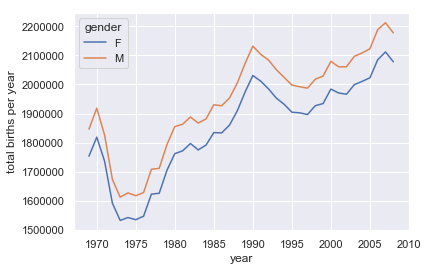

In [240]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

With a simple pivot table and ``plot()`` method, we can immediately see the annual trend in births by gender. By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%.

### Further data exploration

Though this doesn't necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point.
We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th).
One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:

In [241]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution (You can learn more about sigma-clipping operations in a book I coauthored with Željko Ivezić, Andrew J. Connolly, and Alexander Gray: ["Statistics, Data Mining, and Machine Learning in Astronomy"](http://press.princeton.edu/titles/10159.html) (Princeton University Press, 2014)).

With this we can use the ``query()`` method (discussed further in [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)) to filter-out rows with births outside these values:

In [242]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

Next we set the ``day`` column to integers; previously it had been a string because some columns in the dataset contained the value ``'null'``:

In [243]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

Finally, we can combine the day, month, and year to create a Date index (see [Working with Time Series](03.11-Working-with-Time-Series.ipynb)).
This allows us to quickly compute the weekday corresponding to each row:

In [244]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

Using this we can plot births by weekday for several decades:

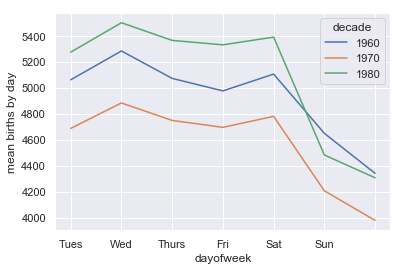

In [245]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another intersting view is to plot the mean number of births by the day of the *year*.
Let's first group the data by month and day separately:

In [246]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

The result is a multi-index over months and days.
To make this easily plottable, let's turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

In [247]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625

Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year.
From this, we can use the ``plot`` method to plot the data. It reveals some interesting trends:

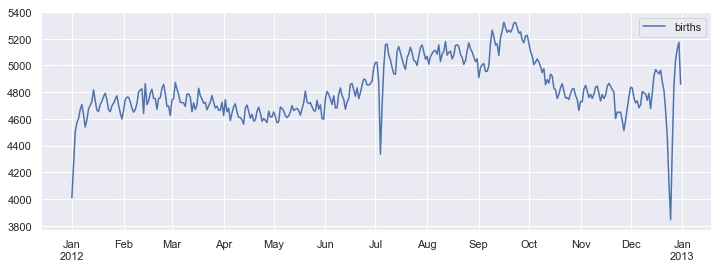

In [248]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In particular, the striking feature of this graph is the dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year's Day) although this likely reflects trends in scheduled/induced births rather than some deep psychosomatic effect on natural births.
For more discussion on this trend, see the analysis and links in [Andrew Gelman's blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/) on the subject.
We'll return to this figure in [Example:-Effect-of-Holidays-on-US-Births](04.09-Text-and-Annotation.ipynb#Example:-Effect-of-Holidays-on-US-Births), where we will use Matplotlib's tools to annotate this plot.

Looking at this short example, you can see that many of the Python and Pandas tools we've seen to this point can be combined and used to gain insight from a variety of datasets.
We will see some more sophisticated applications of these data manipulations in future sections!